In [1]:
from openai import OpenAI
import base64
import requests
from IPython.display import display
from IPython.display import Image as ip_image
from PIL import Image
import json
import aspose.pdf as ap

# OpenAI API Key
api_key = "$"


In [12]:
#%% Image from Path

# Function to display image image from file
def display_image_file(image_path):
    myImage = Image.open(image_path)
    return myImage.show()

# Function to encode the image from file
def encode_image_file(image_path):
  with open(image_path, "rb") as image_file:
      display_image_file(image_path)
      return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "C:\\Users\Maanas\OneDrive - Imperial College London\Blackboard\Research Computing\Project\\characters.jpg"

# Getting the base64 string
base64_image = encode_image_file(image_path)

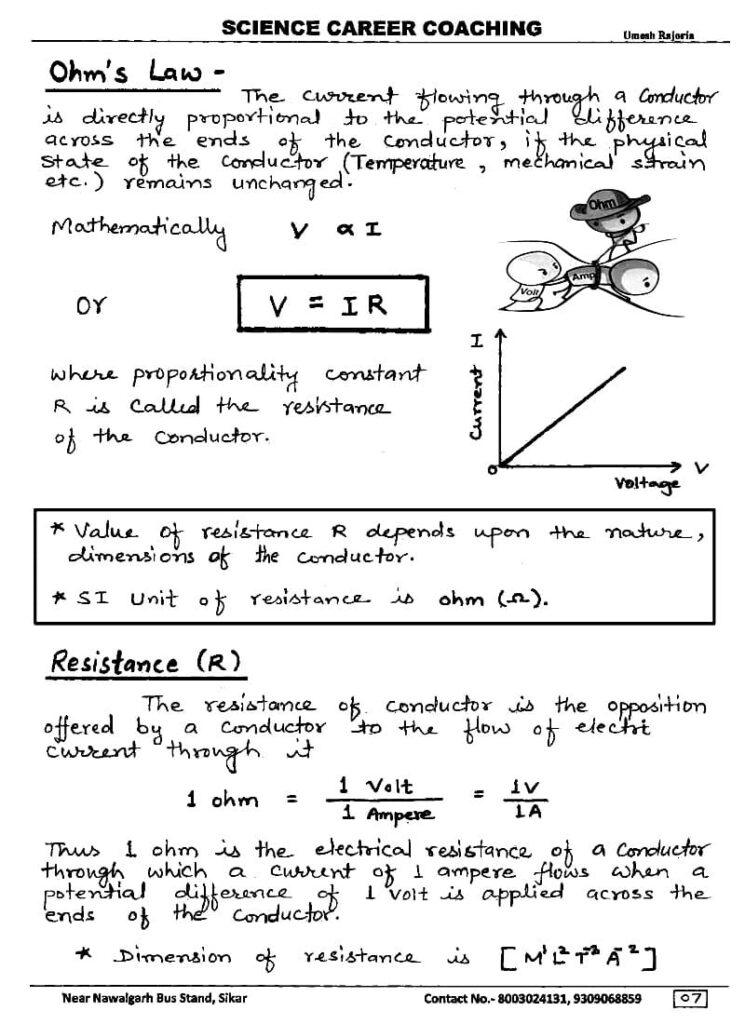

In [3]:

#%% Image from URL

# Function to display image image from url
def display_image_url(url):
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        # Display the image
        display(ip_image(response.content))
    else:
        print("Failed to retrieve the image.")

# Function to encode the image from url
def encode_image_url(url):
    display_image_url(url)
    return base64.b64encode(requests.get(url).content)

# URL of image
image_url = "https://www.sccsikar.com/blog/wp-content/uploads/2022/08/7-4-745x1024.jpg"

# Getting the base64 string
base64_image = encode_image_url(image_url)

In [8]:
#%% GPT 4V text to image - normal instructions

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s written in these notes? Please translate handwriting into text precisely, and write them into Latex so I can directly copy and paste into Latex. Only return the latex code with begin and end document, nothing else."
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 1000
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

# #%% Save extracted text to file

# extracted_text = response.json().text

# f = open("extracted_text.txt","a")

# f.write("\n")
# f.write("\n")
# f.write("---"*30)
# f.write("\n")
# f.write("\n")

# f.write(extracted_text)
# f.close()


{'id': 'chatcmpl-92yzEZfh2Tr293q8yxHlJMQcAcXcG', 'object': 'chat.completion', 'created': 1710498116, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 1497, 'completion_tokens': 429, 'total_tokens': 1926}, 'choices': [{'message': {'role': 'assistant', 'content': '```latex\n\\documentclass{article}\n\\usepackage{amsmath}\n\\usepackage{amsfonts}\n\\usepackage{amssymb}\n\n\\begin{document}\n\\[\n\\begin{array}{cccccccccccccccc}\n\\sigma & \\tau & \\phi & 5 & 8 & \\omega_c & \\pi^3 & U & O & \\iota & N & \\varepsilon & \\theta  & Q & C & \\upsilon \\\\\n\\xi & \\nu_{x} & 6 & \\Theta & \\Upsilon & \\Omega & k_B & \\nu & K & \\Sigma & G & I & P & 3 & c & n \\\\\nA & \\lambda & b & s & w & Z & E & H & k & o & x_6 & t & \\psi & o & l & \\Gamma \\\\\n\\epsilon & A & f & \\beta & \\pi & D & W & T & \\Delta & X & 2 & T & m & \\Pi & \\tau & O \\\\\ni & J & \\Psi & \\rho & \\mu_R & 9 & \\omega & \\alpha_{\\beta} & \\Upsilon & \\left[ \\right] & 0 & \\chi & v & a & F & h \\\\\n\\sigma

In [10]:
# print((response.json()['choices'][0]['message']['content']))

#assign response to variable and clean

tex_code = response.json()['choices'][0]['message']['content'].replace('```latex', '').replace('```', '')
# print(tex_code)



#save tex file

f = open("characters.tex","w+")
f.write(tex_code)
f.write("\n")
f.write("\n")
f.close()



#https://blog.aspose.com/pdf/convert-latex-to-pdf-in-python/#:~:text=to%20PDF%20Converter-,Python%20LaTeX%20to%20PDF%20Converter,to%20PDF%20in%20this%20article

# Convert Latex to PDF
# Create TeXLoadOptions class object
options = ap.TeXLoadOptions()

# Create a Document class object
document = ap.Document("characters.tex" , options)

# Convert Latex to PDF
document.save("characters.pdf")

In [29]:
#%% GPT 4V text to image - extra instructions - look for boxes, bold font, etc

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s written in these notes? Please translate handwriting into text precisely, and write them into Latex so I can directly copy and paste into Latex. Locate all the handwritten text which has been boxed, highlighted, written in bold, underlined, italicised, or marked distinctly (for example, using stars) and in the Latex file, write them in a seperate section."
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 1000
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

#%% Save extracted text to file

# extracted_text = response.json()

# f = open("extracted_text.txt","a")

# f.write("\n")
# f.write("\n")
# f.write("---"*30)
# f.write("\n")
# f.write("\n")

# f.write(extracted_text)
# f.close()


{'id': 'chatcmpl-921scBuW7YEtnpbM2ObKHH8ruSWNW', 'object': 'chat.completion', 'created': 1710270910, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 849, 'completion_tokens': 580, 'total_tokens': 1429}, 'choices': [{'message': {'role': 'assistant', 'content': 'The image provided contains a set of handwritten notes on "Ohm\'s Law" and related concepts. Below is the transcription of the text as you would enter it into LaTeX, including the distinctive notations as a separate section as requested.\n\nLaTeX transcription of the notes:\n```latex\n\\documentclass{article}\n\\usepackage{amsmath}\n\n\\begin{document}\n\n\\section*{Ohm\'s Law}\nThe current flowing through a conductor is directly proportional to the potential difference across the ends of the conductor, if the physical state of the conductor (Temperature, mechanical strain etc.) remains unchanged.\n\nMathematically,\n\\[\nV \\propto I\n\\]\nOr\n\\[\nV = IR\n\\]\n\nwhere proportionality constant $R$ is called the 

# Other models

In [ ]:
#%% Claude text to image

#%% Save extracted text to file

extracted_text = response.json()

f = open("extracted_text.txt","a")

f.write("\n")
f.write("\n")
f.write("---"*30)
f.write("\n")
f.write("\n")

f.write(extracted_text)
f.close()


In [ ]:
#%% Gemini text to image


#%% Save extracted text to file

extracted_text = response.json()

f = open("extracted_text.txt","a")

f.write("\n")
f.write("\n")
f.write("---"*30)
f.write("\n")
f.write("\n")

f.write(extracted_text)
f.close()



# Q&A Section

In [ ]:
#%% GPT 4 interaction - questions

def ask_questions_from_file(file_path, questions):
    # Read file content
    with open(file_path, 'r') as file:
        file_content = file.read()

    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }

    payload = {
        "model": "gpt-4",
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "Using the uploaded document as your primary data source to answer a few questions."
                    },
                    {
                        "type": "text",
                        "text": file_content
                    }
                ]
            }
        ],
        "max_tokens": 1000
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    print(response.json())

#%%%

# Example usage
file_path = '...'

questions = [
    "What is the main idea of this document?",
    "Can you summarize the key points?",
    "What are the implications of this information?"
]

ask_questions_from_file(file_path, questions)

In [ ]:

#%% Claude interaction - questions

def ask_questions_from_file(file_path, questions):
    # Read file content
    with open(file_path, 'r') as file:
        file_content = file.read()

    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }

    payload = {
        "model": "gpt-4",
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "Using the uploaded document as your primary data source to answer a few questions."
                    },
                    {
                        "type": "text",
                        "text": file_content
                    }
                ]
            }
        ],
        "max_tokens": 1000
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    print(response.json())

#%%%

# Example usage
file_path = '...'

questions = [
    "What is the main idea of this document?",
    "Can you summarize the key points?",
    "What are the implications of this information?"
]

ask_questions_from_file(file_path, questions)


In [ ]:
#%% Gemini interaction - questions

def ask_questions_from_file(file_path, questions):
    # Read file content
    with open(file_path, 'r') as file:
        file_content = file.read()

    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }

    payload = {
        "model": "gpt-4",
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "Using the uploaded document as your primary data source to answer a few questions."
                    },
                    {
                        "type": "text",
                        "text": file_content
                    }
                ]
            }
        ],
        "max_tokens": 1000
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    print(response.json())

#%%%

# Example usage
file_path = '...'

questions = [
    "What is the main idea of this document?",
    "Can you summarize the key points?",
    "What are the implications of this information?"
]

ask_questions_from_file(file_path, questions)

